In [8]:
import torch
from torchmetrics.functional.classification import binary_jaccard_index, binary_precision, binary_recall, binary_f1_score, binary_accuracy

# Every possible case

In [2]:
size = 1000
prediction = torch.zeros([size,size])
target = torch.ones([size,size])
dice = []
f1 = []
jaccard = []
prec = []
rec = []

for x in range(size + 1):
    assert prediction.shape == target.shape
    f1.append(binary_f1_score(prediction, target).item())
    jaccard.append(binary_jaccard_index(prediction, target).item())
    prec.append(binary_precision(prediction, target).item())
    rec.append(binary_recall(prediction, target).item())
    if x == size:
        break
    prediction[x] = torch.ones([1,size])


KeyboardInterrupt: 

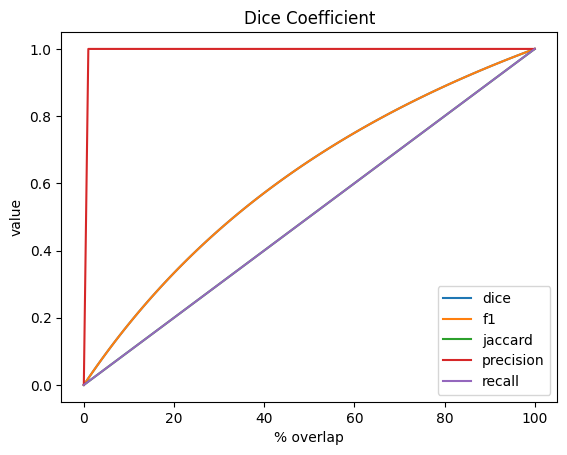

In [ ]:
import matplotlib.pyplot as plt  
x = range(size + 1)    
plt.plot(x, dice, label = "dice")
plt.plot(x, f1, label = "f1")
plt.plot(x, jaccard, label = "jaccard") 
plt.plot(x, prec, label="precision")
plt.plot(x, rec, label="recall")   
plt.xlabel('% overlap')  
plt.ylabel('value') 
ax = plt.gca()    
ax.legend(['dice', 'f1', 'jaccard', 'precision', 'recall'])
plt.title('Dice Coefficient')    
plt.show()

Oberservation: dice = f1 and jaccard(IoU) = recall

# Real use case

In [3]:
from PIL import Image
import numpy as np
target = np.array(Image.open("./25.png").convert("L"), dtype=np.float32)
target[target <= 50] = 0
target[target >= 200.0] = 1.0
target = torch.Tensor(target)

prediction = np.array(Image.open("./pred_25.png").convert("L"), dtype=np.float32)
prediction[prediction <= 50] = 0
prediction[prediction >= 200.0] = 1.0
prediction = torch.Tensor(prediction)

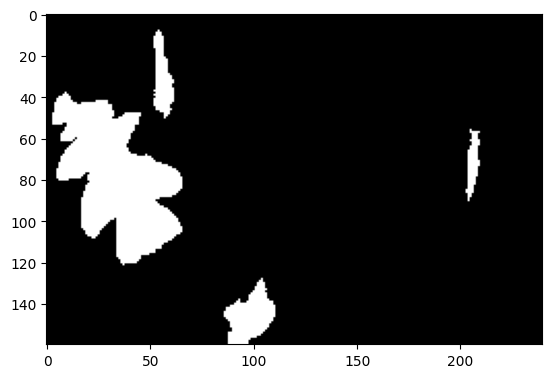

In [4]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(target, cmap="gray")

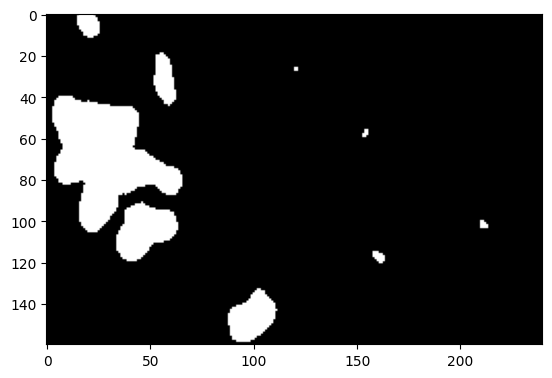

In [5]:
imgplot = plt.imshow(prediction, cmap="gray")

In [9]:
assert prediction.shape == target.shape
f1 = binary_f1_score(prediction, target).item() # Dice-Coefficient
jaccard = binary_jaccard_index(prediction, target).item() # IoU
precision = binary_precision(prediction, target).item()
recall = binary_recall(prediction, target).item()
accuracy = binary_accuracy(prediction, target).item()
print(f"F1: {f1}\nJaccard: {jaccard}\nPrecision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

F1: 0.8541836738586426
Jaccard: 0.745480477809906
Precision: 0.8803370594978333
Recall: 0.82953941822052
Accuracy: 0.9721354246139526


In [10]:
torch.logical_and(prediction, target).sum() / torch.logical_or(prediction, target).sum()

tensor(0.7455)